In [1]:
import pandas as pd
import sqlite3

In [2]:
df = pd.read_csv('zomato.csv', encoding='latin1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.drop_duplicates(inplace=True)

In [18]:
df = df.dropna(subset=['City', 'Cuisines', 'Currency'])

In [17]:
df = df.dropna(subset=['Aggregate_rating'])

In [19]:
conn = sqlite3.connect('zomato.db')
df.to_sql('Restaurants', conn, if_exists='replace', index=False)

9542

In [20]:
pd.read_sql("SELECT * FROM Restaurants LIMIT 5;", conn)

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [21]:
query = '''
SELECT City, COUNT(Restaurant_ID) AS Total_Restaurants
FROM Restaurants
GROUP BY City
ORDER BY Total_Restaurants DESC
LIMIT 10;
'''
pd.read_sql(query, conn)


,City,Total_Restaurants
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25
5,Lucknow,21
6,Guwahati,21
7,Bhubaneshwar,21
8,Amritsar,21
9,Ahmedabad,21


In [23]:
query = '''
WITH CuisineRatings AS (
    SELECT Cuisines, AVG(Aggregate_rating) AS Avg_Rating
    FROM Restaurants
    GROUP BY Cuisines
)
SELECT * FROM CuisineRatings
ORDER BY Avg_Rating DESC
LIMIT 10;
'''
pd.read_sql(query, conn)


,Cuisines,Avg_Rating
0,"American, BBQ, Sandwich",4.9
1,"American, Burger, Grill",4.9
2,"American, Caribbean, Seafood",4.9
3,"American, Coffee and Tea",4.9
4,"American, Sandwich, Tea",4.9
5,"BBQ, Breakfast, Southern",4.9
6,"Burger, Bar Food, Steak",4.9
7,"Continental, Indian",4.9
8,"European, Asian, Indian",4.9
9,"European, Contemporary",4.9


In [24]:
query = '''
SELECT City,
       ROUND(AVG(Average_Cost_for_two), 2) AS Avg_Cost,
       RANK() OVER (ORDER BY AVG(Average_Cost_for_two) DESC) AS City_Rank
FROM Restaurants
GROUP BY City;
'''
pd.read_sql(query, conn)


,City,Avg_Cost,City_Rank
0,Jakarta,308437.50,1
1,Tangerang,250000.00,2
2,Bogor,160000.00,3
3,Bandung,150000.00,4
4,Pasay City,3333.33,5
...,...,...,...
135,Fernley,10.00,133
136,Clatskanie,10.00,133
137,Lakes Entrance,7.00,138
138,Inverloch,7.00,138


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

C:\Users\dell\AppData\Local\Temp\ipykernel_12460\2256609669.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='City', x='Total_Restaurants', data=df1, palette='viridis')


FileNotFoundError: [Errno 2] No such file or directory: '../visuals/top_cities.png'

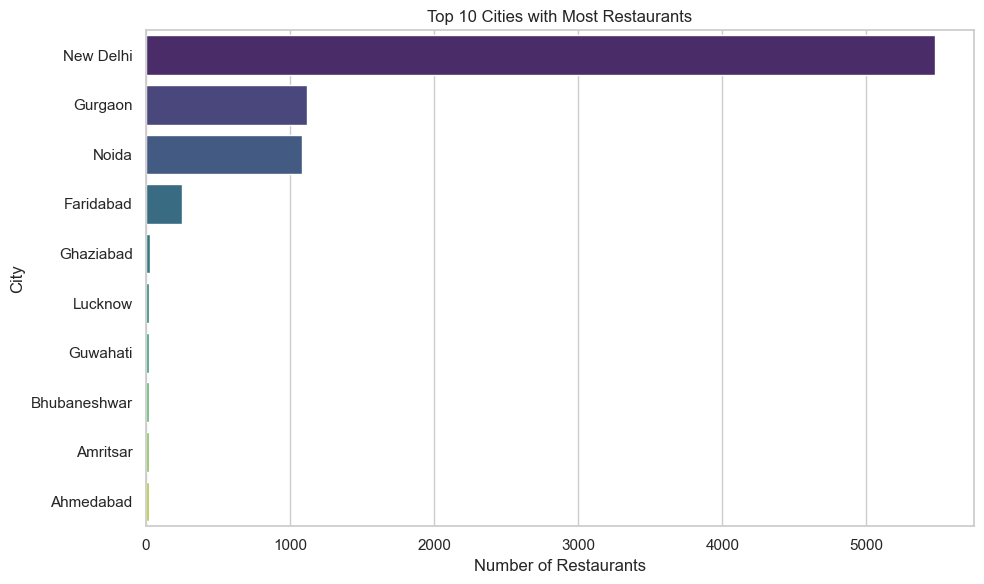

In [26]:
query = '''
SELECT City, COUNT(Restaurant_ID) AS Total_Restaurants
FROM Restaurants
GROUP BY City
ORDER BY Total_Restaurants DESC
LIMIT 10;
'''
df1 = pd.read_sql(query, conn)

plt.figure(figsize=(10,6))
sns.barplot(y='City', x='Total_Restaurants', data=df1, palette='viridis')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('../visuals/top_cities.png')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '../visuals/online_delivery_rating.png'

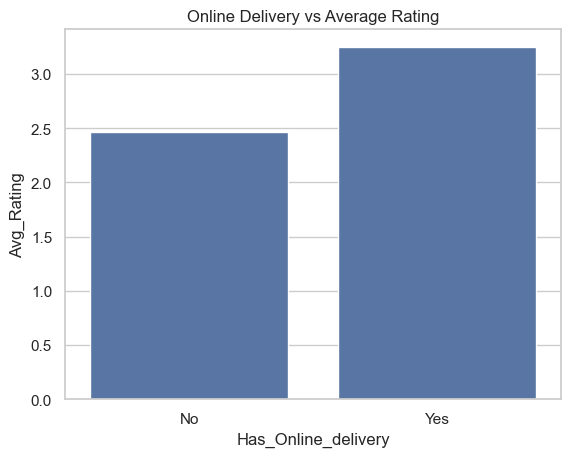

In [28]:
query = '''
SELECT Has_Online_delivery, AVG(Aggregate_rating) AS Avg_Rating
FROM Restaurants
GROUP BY Has_Online_delivery;
'''
df2 = pd.read_sql(query, conn)

sns.barplot(x='Has_Online_delivery', y='Avg_Rating', data=df2)
plt.title('Online Delivery vs Average Rating')
plt.savefig('../visuals/online_delivery_rating.png')
plt.show()


In [ ]:
country_dict = {1:'India',14:'Australia',30:'Brazil',37:'Canada',94:'Indonesia',148:'Singapore',162:'South Africa',166:'Sri Lanka',184:'Turkey',189:'UAE',191:'UK',208:'US'}
df['Country'] = df['Country_Code'].map(country_dict)
df.to_sql('Restaurants', conn, if_exists='replace', index=False)

query = '''
SELECT Country, ROUND(AVG(Average_Cost_for_two),2) AS Avg_Cost
FROM Restaurants
GROUP BY Country
ORDER BY Avg_Cost DESC;
'''
df3 = pd.read_sql(query, conn)

sns.barplot(y='Country', x='Avg_Cost', data=df3, palette='coolwarm')
plt.title('Average Cost for Two by Country')
plt.savefig('../visuals/country_cost.png')
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_12460\911412029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Country', x='Avg_Cost', data=df3, palette='coolwarm')


FileNotFoundError: [Errno 2] No such file or directory: '../visuals/country_cost.png'